App review sentiment analysis is evaluating and understanding the sentiments expressed by an app users.It can acheived using Data Analysis techniques and visualization.In this project , the sentiments in these reviews are labelled as Positive , Negative or Neutral.

In [1]:
# import the necessary python libraies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load Dataset


In [2]:
linkedin_data = pd.read_csv("linkedin-reviews.csv")

In [3]:
#Display first few rows of Dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


In [4]:
print(linkedin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


Exploratory Data Analysis:We start with analysing the distribution of rating to get insight into overall sentiment of the reviews.

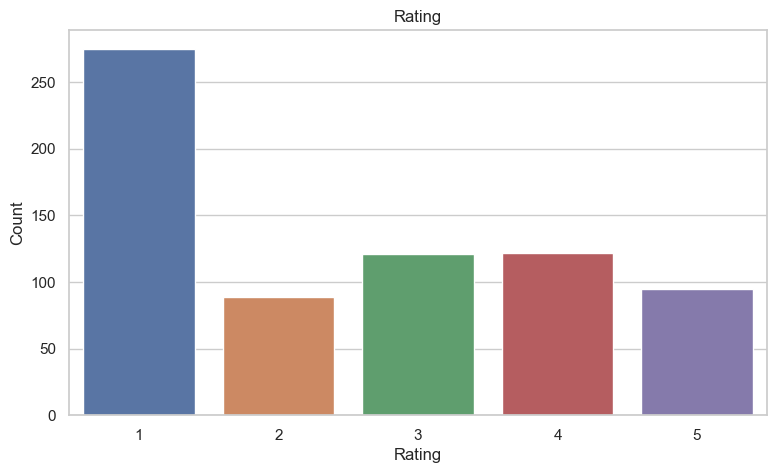

In [5]:
#Plotting the distribution of ratings
sns.set(style='whitegrid')
plt.figure(figsize =(9, 5))
sns.countplot(data = linkedin_data, x ='Rating')
plt.title("Distribution of Ratings")
plt.title('Rating')
plt.ylabel("Count")
plt.show()

Analysing the length of review to corelate with the sentiment or detail of feedback

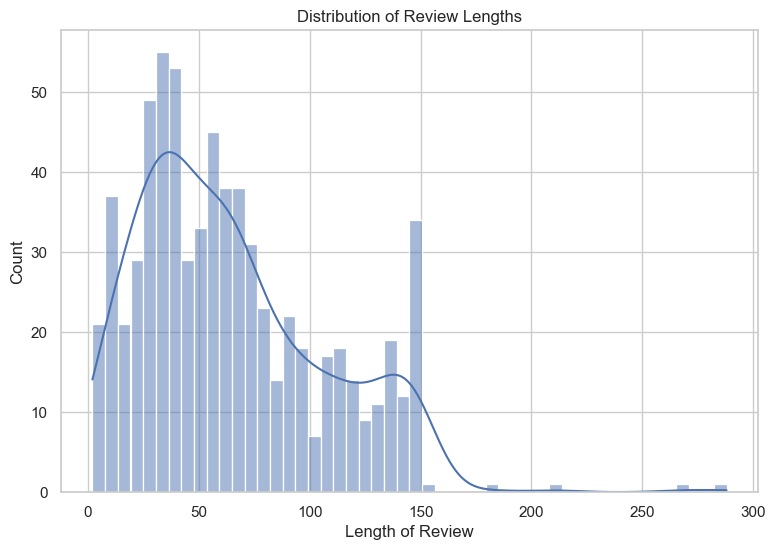

In [6]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [7]:
pip install textblob

Labeling the datasets with the help of TextBlob for sentiment analysis.To classify the sentiments as Positive , Neutral or Negative

In [8]:
from textblob import TextBlob
def textblob_sentiment_analysis(review):
    #Analysing the sentiment
    sentiment = TextBlob(review).sentiment
    #classify based on the polarity 
    if sentiment.polarity > 0.1:
     return 'Positive'
    elif sentiment.polarity < -0.1:
     return 'Negative'
    else:
     return "Neutral"
linkedin_data['sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)
print(linkedin_data.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


In [9]:
Analysing the distribution of sentiment across the dataset

SyntaxError: invalid syntax (535391303.py, line 1)

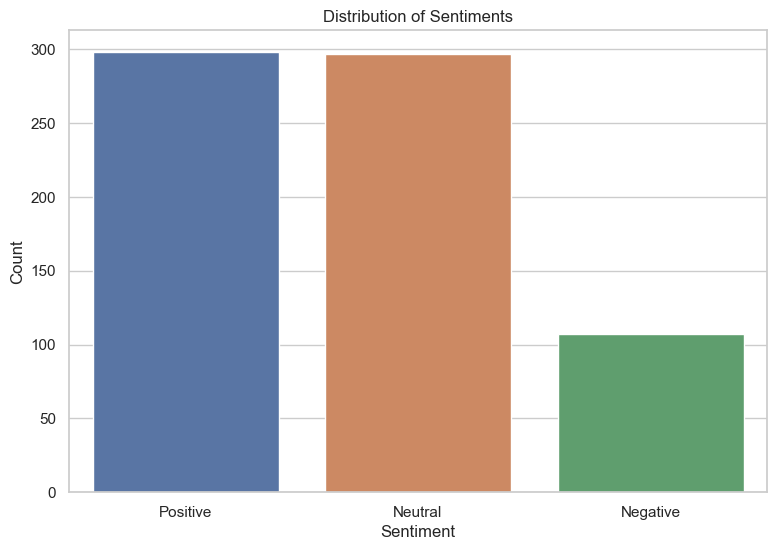

In [10]:
sentiment_distribution =linkedin_data['sentiment'].value_counts()
#plotting the distribution of sentiment
plt.figure(figsize = (9 ,6))
sns.barplot(x= sentiment_distribution.index ,y= sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel("Count")
plt.show()


Exploring the relationship between sentiments and ratings.This will us an understanding of correlation between sentiments and numerical rating. 

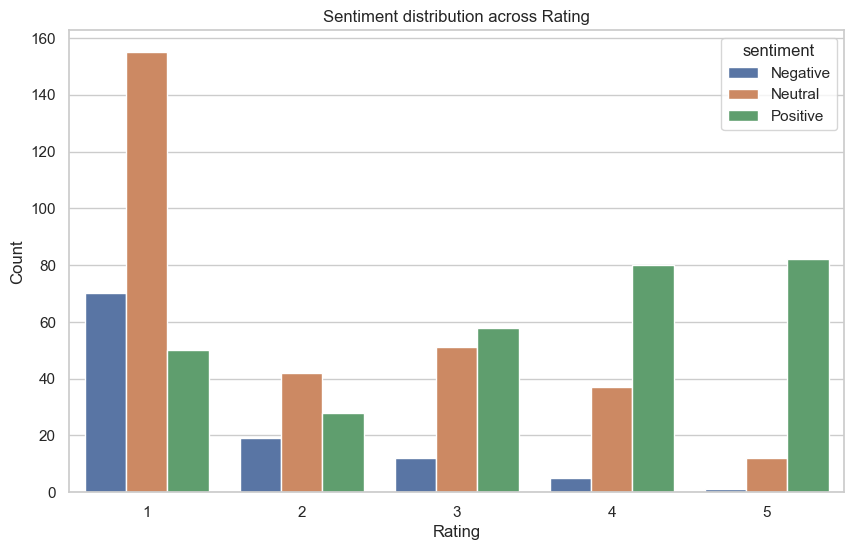

In [11]:
plt.figure(figsize =(10 , 6))
sns.countplot(data =linkedin_data , x='Rating' , hue='sentiment')
plt.title('Sentiment distribution across Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title ='sentiment')
plt.show()

In [12]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


Text analysis can be carried out to identify common words and theme within each sentiment  category.This analysis will examine
the frequently used word in positive , negative and neutral review using word cloud

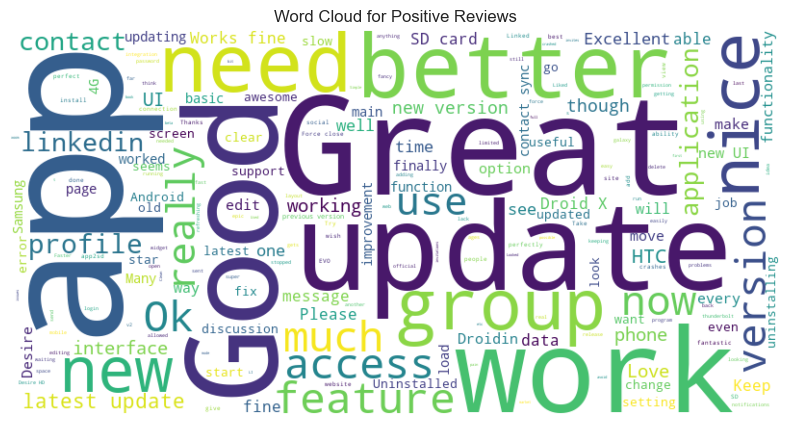

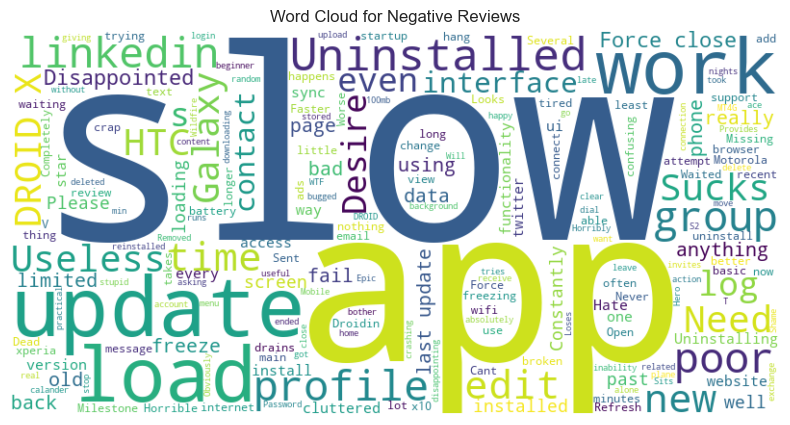

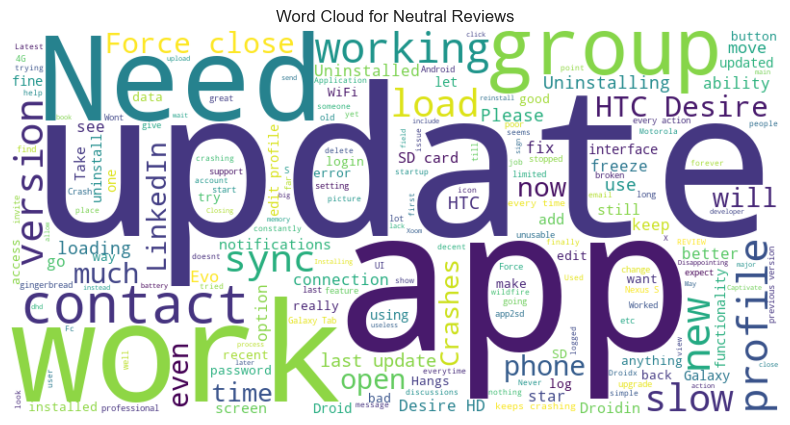

In [13]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

App Review Anlaysis is a useful tool for App developers and business to understand the feedback, prioritize feature update 
and maintain positive user community.